In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import colors 

# Analysis of the speaker


In [2]:
#conv_tab is the file which contains ID conversation and ID of the speaker
#caller_tab specifies information about speaker as age, sex and Geography
# import data

#conv_dati = pd.read_csv("C:\\Users\\simon\\Desktop\\SWITCHBOARD_CORPUS\\conv_tab.csv")
conv_dati = pd.read_csv("..\conv_tab.csv")
caller_tab = pd.read_csv("..\caller_tab.csv")

In [131]:
from collections import Counter 

conv_dati = conv_dati[conv_dati['id_topic'] != ' UNK']
speakers = list(conv_dati['speaker_A'].values)
speakers += list(conv_dati['speaker_B'].values)
c=Counter(speakers) 

ID_SPEAKER = list()
COUNT_CONV = list()

for id_speaker in list(set (speakers)):
    ID_SPEAKER.append(id_speaker)
    COUNT_CONV.append(c[id_speaker])

frame = [('ID_speakers', ID_SPEAKER),
         ('number_conv', COUNT_CONV),
         ]    
conv_per_speakers_df = pd.DataFrame.from_items(frame)
len(conv_per_speakers_df[conv_per_speakers_df['number_conv'] > 1])

483

Text(0.5,1,'Number of conversation per speaker')

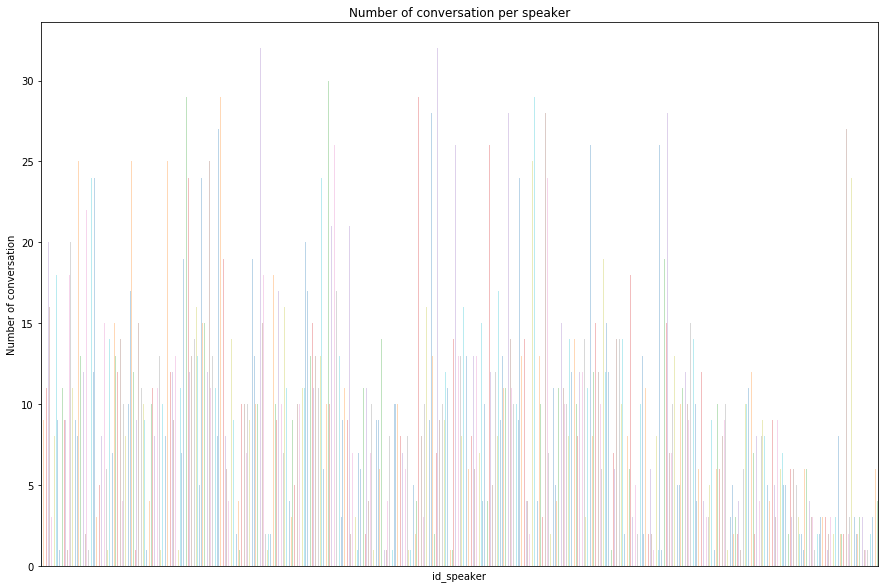

In [72]:
# PLOT THE Number of Conversation per Speaker A
conv_per_speakers_df['number_conv'].plot(kind='bar', grid=False,alpha = 0.3, figsize= (15,10))
#plt.legend(['speaker A', 'speaker B'])

cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])


plt.xlabel('id_speaker') 
plt.ylabel('Number of conversation')
plt.title('Number of conversation per speaker')

520

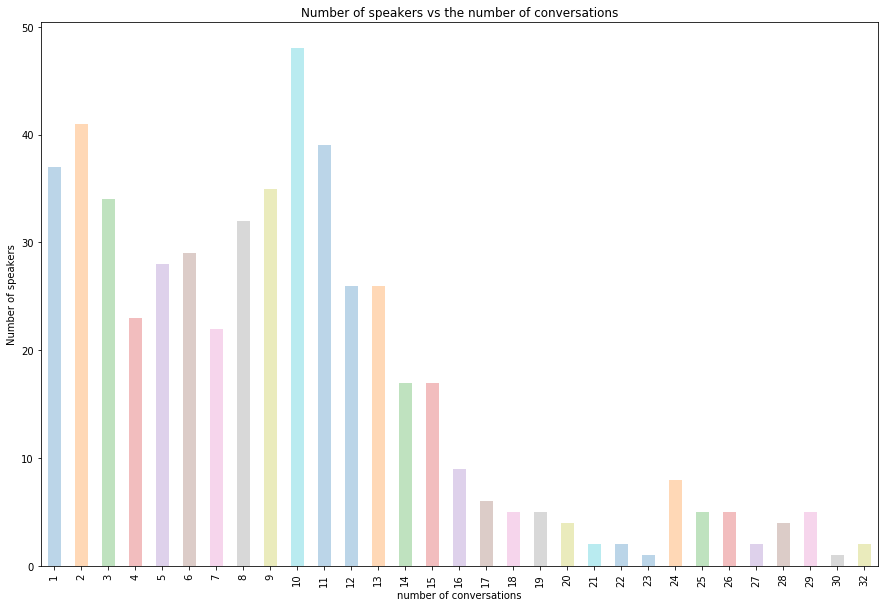

In [121]:
# PLOT the number of conversation vs the number of speaker with the corresponding conversations.
# example just one speaker has more than 60 conversations as speaker A

speaker_group = conv_per_speakers_df.groupby('number_conv')

#speaker_group = conv_per_speakers_df.groupby('number_conv')

speaker_group.size().plot(kind = 'bar', grid=False,  alpha = 0.3, figsize= (15,10))
plt.xlabel('number of conversations') 
plt.ylabel('Number of speakers')
plt.title('Number of speakers vs the number of conversations')
speaker_group.size().sum()